# Nettverksanalyse i sgis
https://github.com/statisticsnorway/ssb-sgis

Åpne heller notebooken her: https://nbviewer.org/github/statisticsnorway/intro_til_geopandas/blob/main/nettverksanalyse.ipynb

In [1]:
# midlrertidig pga noen lokale endringer i pakka
import os
while "ssb-sgis" not in os.listdir():
    os.chdir("..")
os.chdir("ssb-sgis/src")
os.listdir()

['sgis']

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import sgis as sg

## Hente data

Henter data for veger og bygningspunkter i Oslo og to nabokommuner (Bærum og Nordre follo).

In [3]:
kartdata = "ssb-prod-kart-data-delt/kartdata_analyse/klargjorte-data"

veger = sg.read_geopandas(
    f"{kartdata}/2022/NVDB_ruteplan_nettverk_p20220703_v1.parquet",
    filters=[("KOMMUNENR", "in", ('0301', '3024', '3020'))]
     )

veger = veger[["oneway", "drivetime_fw", "drivetime_bw", "roadid", "KOMMUNENR", "geometry"]]

veger

,oneway,drivetime_fw,drivetime_bw,roadid,KOMMUNENR,geometry
119702,B,0.216611,0.216611,{S944},0301,MULTILINESTRING Z ((258028.440 6674249.890 413...
189106,B,0.087743,0.087743,{P99633},3020,MULTILINESTRING Z ((267535.900 6626904.300 125...
189109,B,0.124622,0.124622,{P5300},3020,MULTILINESTRING Z ((267234.416 6629037.819 140...
189277,B,0.107511,0.107511,{K6100},3020,MULTILINESTRING Z ((271502.710 6620482.300 157...
189278,B,0.057101,0.057101,{K6100},3020,MULTILINESTRING Z ((271476.937 6620508.594 154...
...,...,...,...,...,...,...
1944347,B,0.175876,0.175876,{P91422},0301,MULTILINESTRING Z ((260762.830 6650240.620 43....
1948011,B,0.111139,0.111139,{P2050},3020,MULTILINESTRING Z ((266108.070 6626317.900 130...
1948017,B,0.136247,0.136247,{P4900},3020,MULTILINESTRING Z ((267013.150 6627652.210 151...
1948023,B,0.108602,0.108602,{P4900},3020,MULTILINESTRING Z ((267013.150 6627652.210 151...


In [5]:
aar = 2022

bygningspunktsti = f"ssb-prod-kart-data-delt/kartdata_analyse/klargjorte-data/{aar}/SMAT_bygg_punkt_p{aar}_v1.parquet"

bygg = sg.read_geopandas(
    bygningspunktsti,
    filters=[("KOMMUNENR", "in", ('0301', '3024', '3020'))],
    columns=["KOMMUNENR", "BYGTYPE", "AREAL_E2", "DATOMERGE", "geometry"]
)

bygg["aar"] = bygg.DATOMERGE.map(lambda x: int(x[:4].replace(" ", "0")))

bygg

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar
2126288,3020,181,33.0,20080101,POINT (269263.000 6617407.000),2008
2126460,3020,113,92.0,,POINT (267831.000 6616413.000),0
2126732,3020,181,33.0,,POINT (270268.000 6617244.000),0
2126740,3020,241,115.0,18700101,POINT (268989.000 6617320.000),1870
2126749,3020,181,17.0,,POINT (269058.000 6617321.000),0
...,...,...,...,...,...,...
2704094,0301,161,59.0,19010101,POINT (258558.000 6667933.000),1901
2704589,0301,161,59.0,19010101,POINT (258492.000 6667941.000),1901
2704605,0301,183,31.0,19010101,POINT (258532.000 6668042.000),1901
2704777,0301,181,33.0,19931123,POINT (256610.000 6668631.000),1993


In [6]:
origins = bygg.sample(1000)

origins.index = np.arange(0, 1000)

origins

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar
0,3024,111,59.0,18420115,POINT (245133.000 6653902.000),1842
1,0301,111,130.0,19870710,POINT (271714.000 6652139.000),1987
2,3020,181,33.0,,POINT (270852.000 6631962.000),0
3,0301,121,54.0,20100811,POINT (257025.000 6652145.000),2010
4,0301,181,33.0,19010101,POINT (262030.000 6651322.000),1901
...,...,...,...,...,...,...
995,3024,131,60.0,19830815,POINT (249127.000 6653042.000),1983
996,0301,131,60.0,19780301,POINT (257751.000 6650594.000),1978
997,3024,181,1048.0,19811215,POINT (248739.000 6652049.000),1981
998,3024,181,42.0,19970219,POINT (247899.000 6647412.000),1997


In [7]:
destinations = bygg.sample(1000)

destinations.index = np.arange(1000, 2000)

destinations

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar
1000,3020,181,20.0,19950728,POINT (264092.000 6634217.000),1995
1001,3024,182,16.0,,POINT (243959.000 6647993.000),0
1002,3024,181,46.0,20001128,POINT (247435.000 6646747.000),2000
1003,0301,181,228.0,19870202,POINT (271939.000 6651395.000),1987
1004,0301,181,41.0,19900903,POINT (265422.000 6644008.000),1990
...,...,...,...,...,...,...
1995,0301,131,64.0,19800901,POINT (264686.000 6641014.000),1980
1996,0301,111,62.0,19390101,POINT (256485.000 6654675.000),1939
1997,3024,181,33.0,,POINT (248526.000 6653844.000),0
1998,3020,112,95.0,19970910,POINT (266256.000 6625656.000),1997


## Gjør klar til nettverksanalyse
Man starter med å lage et "nettverk" og regler for analysen. Sp putter man det i NetworkAnalysis-klassen.

In [8]:
nw = (
    sg.DirectedNetwork(veger)
    .remove_isolated()
    .make_directed_network_norway()
)

rules = sg.NetworkAnalysisRules(weight="minutes")

nwa = sg.NetworkAnalysis(network=nw, rules=rules)

nwa

NetworkAnalysis(
    network=DirectedNetwork(9522 km, percent_bidirectional=85),
    rules=NetworkAnalysisRules(weight=minutes, search_tolerance=250, search_factor=0, split_lines=False, ...),
    log=True, detailed_log=True,
)

## Finn rutefrekvens

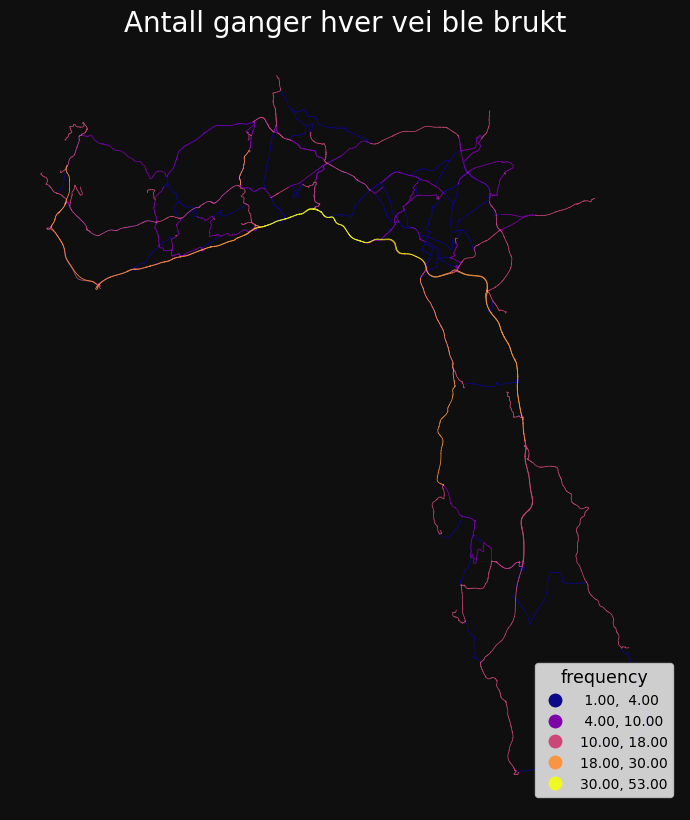

,KOMMUNENR,connected,drivetime_bw,drivetime_fw,idx_orig,meters,minutes,frequency,n_source,n_target,oneway,roadid,source,source_wkt,target,target_wkt,geometry
196914,0301,1.0,-1.0,NaN,1516130,131.523871,0.113439,53.0,2,3,FT,{E18},97533,POINT (258636.4400000004 6650360.98),97535,POINT (258521.0 6650423.1),"LINESTRING Z (258636.440 6650360.980 2.645, 25..."
196912,0301,1.0,-1.0,NaN,1516122,3.382776,0.002918,53.0,2,2,FT,{E18},97532,POINT (258638.96600000001 6650358.73),97533,POINT (258636.4400000004 6650360.98),"LINESTRING Z (258638.966 6650358.730 2.667, 25..."
196910,0301,1.0,-1.0,NaN,1516114,4.038333,0.003483,53.0,2,2,FT,{E18},97531,POINT (258641.95999999996 6650356.02),97532,POINT (258638.96600000001 6650358.73),"LINESTRING Z (258641.960 6650356.020 2.685, 25..."


In [9]:
frequencies = nwa.get_route_frequencies(origins.sample(15), destinations.sample(15))

sg.qtm(
    sg.buff(frequencies, 15),
    "frequency",
    scheme="naturalbreaks",
    cmap="plasma",
    title="Antall ganger hver vei ble brukt",
)

frequencies.sort_values("frequency", ascending=False).head(3)

## Finn raskeste rute

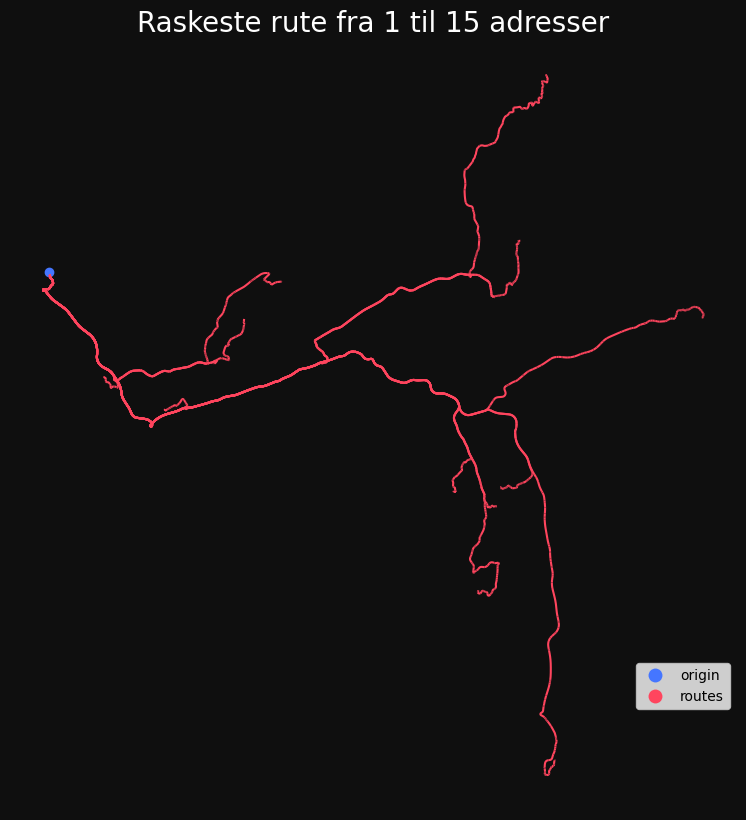

,origin,destination,minutes,geometry
0,0,1404,18.536170,MULTILINESTRING Z ((252780.540 6650273.220 50....
1,0,1251,35.060235,MULTILINESTRING Z ((265473.400 6655233.300 265...
2,0,1707,14.796427,MULTILINESTRING Z ((250135.590 6647896.930 53....
3,0,1691,47.875127,MULTILINESTRING Z ((266486.050 6661686.920 253...
4,0,1767,28.162005,MULTILINESTRING Z ((264387.163 6652813.836 116...
5,0,1943,29.960514,MULTILINESTRING Z ((264182.588 6643703.979 69....
6,0,1340,38.826881,MULTILINESTRING Z ((270934.125 6651695.275 166...
7,0,1775,37.853847,MULTILINESTRING Z ((263686.889 6640079.482 94....
8,0,1926,42.057234,MULTILINESTRING Z ((266992.600 6632759.500 146...
9,0,1546,21.929149,MULTILINESTRING Z ((254431.600 6653576.800 150...


In [10]:
origin = origins.iloc[[0]]

routes = nwa.get_route(
    origin,
    destinations.sample(15),
)

sg.qtm(origin, routes, title="Raskeste rute fra 1 til 15 adresser")

routes

### Service area

,minutes,geometry
0,1,MULTILINESTRING Z ((245157.180 6653704.860 154...
1,2,MULTILINESTRING Z ((245272.400 6653370.400 124...
2,3,MULTILINESTRING Z ((245050.710 6653165.490 102...
3,4,MULTILINESTRING Z ((245024.710 6653175.430 102...
4,5,MULTILINESTRING Z ((246357.700 6651748.820 58....
5,6,MULTILINESTRING Z ((246358.421 6651773.487 59....
6,7,MULTILINESTRING Z ((247582.630 6651570.090 92....
7,8,MULTILINESTRING Z ((243188.100 6654561.600 221...
8,9,MULTILINESTRING Z ((249233.600 6649603.200 68....
9,10,MULTILINESTRING Z ((248741.950 6648069.780 8.2...


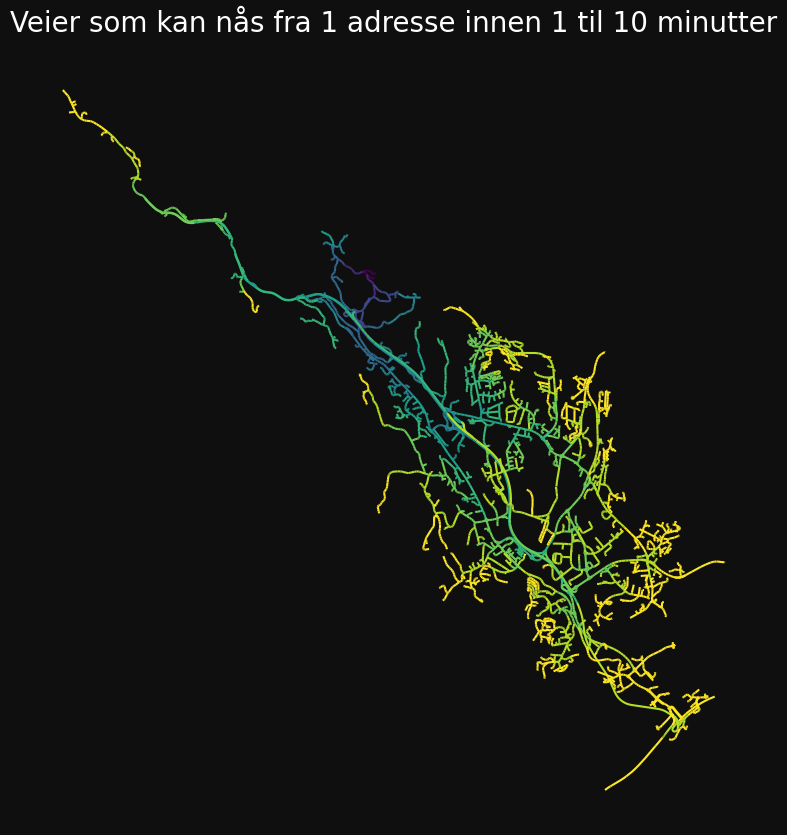

In [22]:
service_areas = nwa.service_area(
    origin,
    breaks=np.arange(1, 11),
)

sg.qtm(service_areas, "minutes", k=10, title="Veier som kan nås fra 1 adresse innen 1 til 10 minutter", legend=False)

service_areas

### Reisetider: OD Cost Matrix

In [12]:
od = nwa.od_cost_matrix(
    origins,
    destinations,
)
od

,origin,destination,minutes
0,0,1000,44.510749
1,0,1001,NaN
2,0,1002,13.958094
3,0,1003,33.604567
4,0,1004,30.239784
...,...,...,...
999995,999,1995,38.039927
999996,999,1996,53.997860
999997,999,1997,60.936736
999998,999,1998,12.904503


Kolonnene 'origin' og 'destination' bruker index-en til inputene.

Man kan derfor enkelt koble resultatene med dataene:

In [13]:
origins_joinet = origins.join(od.set_index("origin"))
origins_joinet

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar,destination,minutes
0,3024,111,59.0,18420115,POINT (245133.000 6653902.000),1842,1000,44.510749
0,3024,111,59.0,18420115,POINT (245133.000 6653902.000),1842,1001,NaN
0,3024,111,59.0,18420115,POINT (245133.000 6653902.000),1842,1002,13.958094
0,3024,111,59.0,18420115,POINT (245133.000 6653902.000),1842,1003,33.604567
0,3024,111,59.0,18420115,POINT (245133.000 6653902.000),1842,1004,30.239784
...,...,...,...,...,...,...,...,...
999,3020,111,158.0,20130425,POINT (271573.000 6620471.000),2013,1995,38.039927
999,3020,111,158.0,20130425,POINT (271573.000 6620471.000),2013,1996,53.997860
999,3020,111,158.0,20130425,POINT (271573.000 6620471.000),2013,1997,60.936736
999,3020,111,158.0,20130425,POINT (271573.000 6620471.000),2013,1998,12.904503


In [14]:
destinations_joinet = destinations.join(od.set_index("destination"))
destinations_joinet

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar,origin,minutes
1000,3020,181,20.0,19950728,POINT (264092.000 6634217.000),1995,0,44.510749
1000,3020,181,20.0,19950728,POINT (264092.000 6634217.000),1995,1,31.087898
1000,3020,181,20.0,19950728,POINT (264092.000 6634217.000),1995,2,22.489104
1000,3020,181,20.0,19950728,POINT (264092.000 6634217.000),1995,3,35.472098
1000,3020,181,20.0,19950728,POINT (264092.000 6634217.000),1995,4,30.200360
...,...,...,...,...,...,...,...,...
1999,3020,181,38.0,,POINT (269065.000 6627653.000),0,995,51.911490
1999,3020,181,38.0,,POINT (269065.000 6627653.000),0,996,37.776692
1999,3020,181,38.0,,POINT (269065.000 6627653.000),0,997,49.150859
1999,3020,181,38.0,,POINT (269065.000 6627653.000),0,998,47.266158


Eller gi punktene kolonner med aggregerte data:

In [15]:
origins["minutes_mean"] = od.groupby("origin").minutes.mean()
origins["minutes_max"] = od.groupby("origin").minutes.max()
origins

,KOMMUNENR,BYGTYPE,AREAL_E2,DATOMERGE,geometry,aar,minutes_mean,minutes_max
0,3024,111,59.0,18420115,POINT (245133.000 6653902.000),1842,27.626412,63.400963
1,0301,111,130.0,19870710,POINT (271714.000 6652139.000),1987,22.541872,49.978111
2,3020,181,33.0,,POINT (270852.000 6631962.000),0,33.834414,56.531803
3,0301,121,54.0,20100811,POINT (257025.000 6652145.000),2010,19.731688,54.362312
4,0301,181,33.0,19010101,POINT (262030.000 6651322.000),1901,17.579257,49.090574
...,...,...,...,...,...,...,...,...
995,3024,131,60.0,19830815,POINT (249127.000 6653042.000),1983,26.131474,64.152717
996,0301,131,60.0,19780301,POINT (257751.000 6650594.000),1978,17.023718,50.017919
997,3024,181,1048.0,19811215,POINT (248739.000 6652049.000),1981,25.020109,61.392086
998,3024,181,42.0,19970219,POINT (247899.000 6647412.000),1997,23.967783,59.507385


In [16]:
sg.explore(origins, "minutes_mean", scheme="quantiles")

Hvis man vil bruke en kolonne som id-er heller enn index-en, kan man sette index-en inni funksjonen:

In [17]:
od = nwa.od_cost_matrix(
    origins.set_index("KOMMUNENR"),
    destinations,
)
od

,origin,destination,minutes
0,3024,1000,44.510749
1,3024,1001,NaN
2,3024,1002,13.958094
3,3024,1003,33.604567
4,3024,1004,30.239784
...,...,...,...
999995,3020,1995,38.039927
999996,3020,1996,53.997860
999997,3020,1997,60.936736
999998,3020,1998,12.904503


In [18]:
od.groupby("origin").mean()

,destination,minutes
origin,,
0301,1499.5,19.958530
3020,1499.5,29.744395
3024,1499.5,22.378907


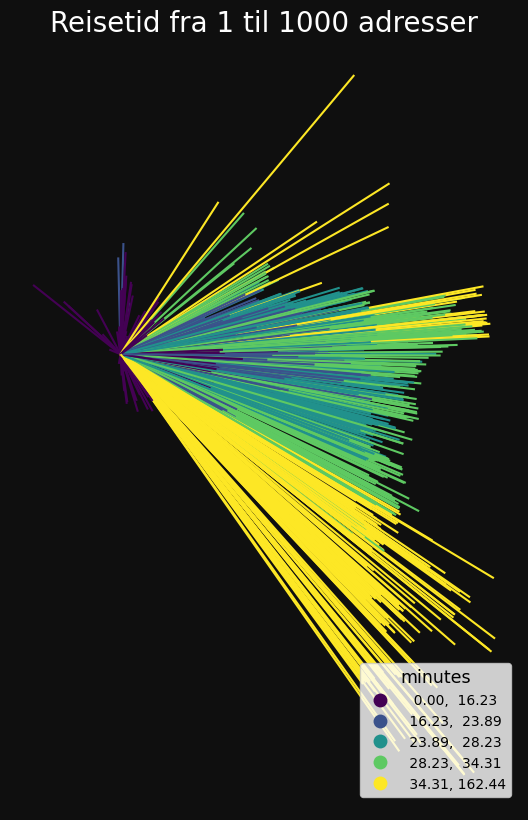

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: title={'center': 'Reisetid fra 1 til 1000 adresser'}>)

In [19]:
od = nwa.od_cost_matrix(
    origins.sample(1),
    origins,
    lines=True
)

sg.qtm(od, "minutes", title="Reisetid fra 1 til 1000 adresser", scheme="quantiles")

## Finn raskeste k ruter

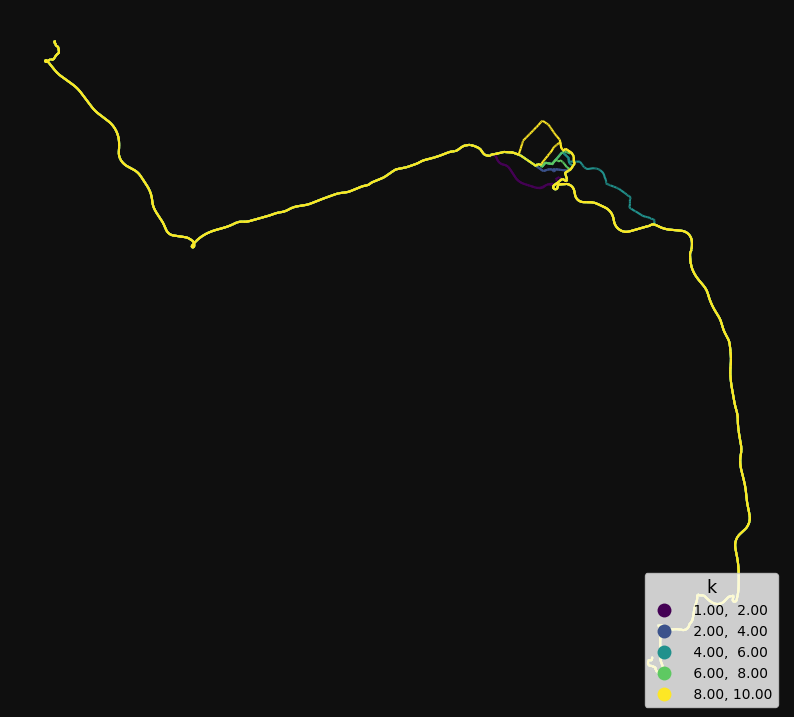

,origin,destination,minutes,k,geometry
0,0,1000,44.510749,1,MULTILINESTRING Z ((264451.600 6633754.100 108...
1,0,1000,46.343907,2,MULTILINESTRING Z ((264451.600 6633754.100 108...
2,0,1000,48.805462,3,MULTILINESTRING Z ((264451.600 6633754.100 108...
3,0,1000,48.891024,4,MULTILINESTRING Z ((264451.600 6633754.100 108...
4,0,1000,50.022317,5,MULTILINESTRING Z ((264451.600 6633754.100 108...
5,0,1000,50.176875,6,MULTILINESTRING Z ((264451.600 6633754.100 108...
6,0,1000,50.294942,7,MULTILINESTRING Z ((264451.600 6633754.100 108...
7,0,1000,51.041618,8,MULTILINESTRING Z ((264451.600 6633754.100 108...
8,0,1000,52.026711,9,MULTILINESTRING Z ((264451.600 6633754.100 108...
9,0,1000,52.210404,10,MULTILINESTRING Z ((264451.600 6633754.100 108...


In [20]:
p1, p2 = origins.iloc[[0]], destinations.iloc[[0]]

k_routes = nwa.get_k_routes(p1, p2, k=10, drop_middle_percent=1)

sg.qtm(k_routes, "k")

k_routes

Sjekk loggen

In [21]:
nwa.log

,endtime,minutes_elapsed,method,origins_count,destinations_count,percent_missing,cost_mean,isolated_removed,percent_bidirectional,weight,...,nodedist_multiplier,nodedist_kmh,cost_p25,cost_median,cost_p75,cost_std,rowwise,breaks,dissolve,lines
0,2023-03-29 11:45:43,0.3,get_route_frequencies,15,15.0,0.0000,0.072162,True,85,minutes,...,None,None,0.011068,0.033283,0.086022,0.109827,NaN,NaN,NaN,NaN
1,2023-03-29 11:46:00,0.2,get_route,1,15.0,0.0000,28.515227,True,85,minutes,...,None,None,19.384415,30.310421,37.155444,11.587423,False,NaN,NaN,NaN
2,2023-03-29 11:46:09,0.1,service_area,1,NaN,0.0000,5.500000,True,85,minutes,...,None,None,3.250000,5.500000,7.750000,3.027650,NaN,"1, 2, 3, 4, 5, 6, 7, 8, 9, 10",True,NaN
3,2023-03-29 11:47:02,0.9,od_cost_matrix,1000,1000.0,2.7808,22.095576,True,85,minutes,...,None,None,14.133044,20.703489,28.333159,11.435272,False,NaN,NaN,False
4,2023-03-29 11:47:56,0.9,od_cost_matrix,1000,1000.0,2.7808,22.095576,True,85,minutes,...,None,None,14.133044,20.703489,28.333159,11.435272,False,NaN,NaN,False
5,2023-03-29 11:48:06,0.2,od_cost_matrix,1,1000.0,1.6000,25.996525,True,85,minutes,...,None,None,18.177847,26.370108,32.585516,11.750358,False,NaN,NaN,True
6,2023-03-29 11:48:19,0.2,get_k_routes,1,1.0,0.0000,49.432401,True,85,minutes,...,None,None,48.826852,50.099596,50.854949,2.429704,False,NaN,NaN,NaN
